---
# <center>Principal components analysis (PCA)</center>
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import some data

In [ ]:
from sklearn.datasets import load_boston

X, _ = load_boston(return_X_y=True)
X = pd.DataFrame(X)

## Scatter plot

<AxesSubplot:xlabel='6', ylabel='7'>

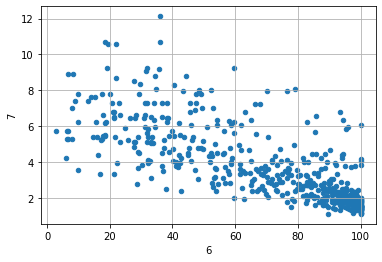

In [3]:
X.plot(kind='scatter',x=6,y=7, grid=True)

# Step 1: Normalize the data

<img src="Xnorm.png" alt="Drawing" style="width: 200px;"/>

In [21]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [4]:
mu = X.mean()
sigma = X.std()

In [ ]:
Xnorm = (X - mu)/sigma

In [25]:
Xnorm.std()

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
dtype: float64

<AxesSubplot:xlabel='6', ylabel='7'>

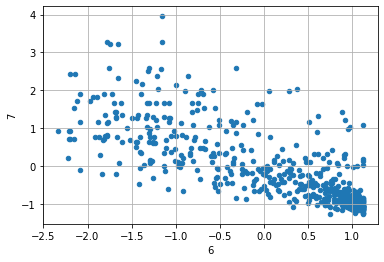

In [5]:
Xnorm.plot(kind='scatter', x=6, y=7, grid=True)

# Step 2: Perform SVD on the normalized data

<img src="svd.png" alt="Drawing" style="width: 200px;"/>

In [6]:
from scipy.linalg import svd

U, s, Vt = svd(Xnorm,full_matrices=False)
Sigma = np.diag(s)
V = Vt.T

## We can check the decomposition

In [7]:
np.allclose(Xnorm, U@Sigma@V.T)

True

## We can recover the original dataset from the decomposition

<img src="unXnorm.png" alt="Drawing" style="width: 200px;"/>

In [18]:
Xrecoverd = mu + sigma * pd.DataFrame(U@Sigma@V.T)
np.allclose(X, Xrecoverd)

True